<a href="https://colab.research.google.com/github/mrishikreddy/nlp/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
noise = np.random.randn(100, 1)
Y = 3 * X + 5 + noise

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [4]:
w = np.random.randn(1)
b = np.random.randn(1)

In [5]:
learning_rate = 0.01
iterations = 1000

In [6]:
def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [7]:
for i in range(iterations):
    # Predictions
    Y_pred_train = w * X_train + b

    # Compute gradients
    dw = -2 * np.mean(X_train * (Y_train - Y_pred_train))
    db = -2 * np.mean(Y_train - Y_pred_train)

    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db

    # Optional: Log progress
    if i % 100 == 0:
        mse = compute_mse(Y_train, Y_pred_train)
        print(f"Iteration {i}: MSE = {mse}")


Iteration 0: MSE = 42.31003798524555
Iteration 100: MSE = 0.969086797073791
Iteration 200: MSE = 0.9305585121849717
Iteration 300: MSE = 0.9149732936436665
Iteration 400: MSE = 0.9064721877093955
Iteration 500: MSE = 0.9018344635216133
Iteration 600: MSE = 0.8993043824621235
Iteration 700: MSE = 0.8979241127633247
Iteration 800: MSE = 0.8971711153705039
Iteration 900: MSE = 0.8967603224116428


In [8]:
Y_pred_train = w * X_train + b
Y_pred_test = w * X_test + b

In [9]:
rmse_train = np.sqrt(np.mean((Y_train - Y_pred_train) ** 2))
rmse_test = np.sqrt(np.mean((Y_test - Y_pred_test) ** 2))

In [10]:
def compute_r2(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

r2_train = compute_r2(Y_train, Y_pred_train)
r2_test = compute_r2(Y_test, Y_pred_test)

In [11]:
print("Model Performance:")
print(f"Train RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")
print(f"Train R^2: {r2_train}")
print(f"Test R^2: {r2_test}")

Model Performance:
Train RMSE: 0.9468559641859584
Test RMSE: 0.7963994165916791
Train R^2: 0.724802854149403
Test R^2: 0.8401701488695268


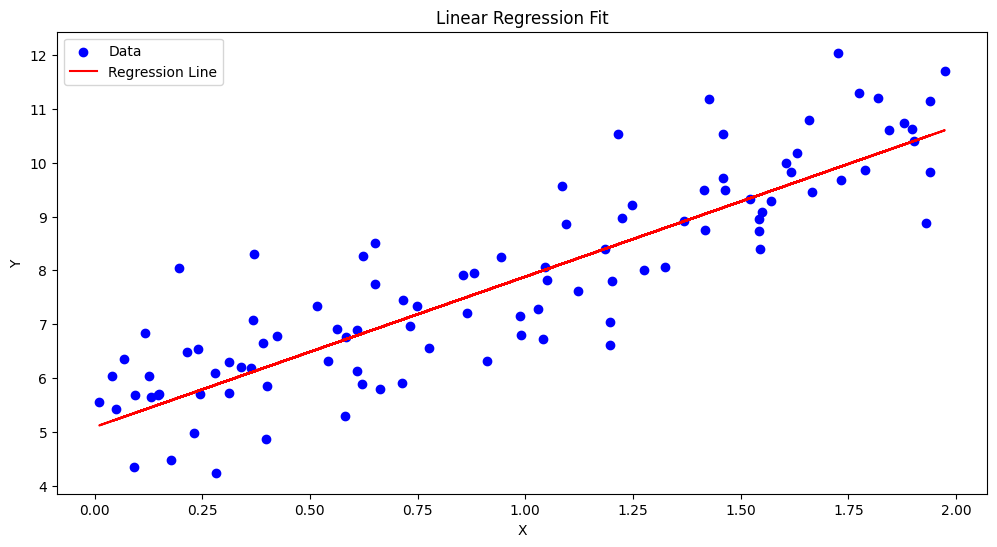

In [12]:
plt.figure(figsize=(12, 6))
plt.scatter(X, Y, label="Data", color="blue")
plt.plot(X, w * X + b, label="Regression Line", color="red")
plt.title("Linear Regression Fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()